In [2]:
from sklearn.datasets import load_svmlight_file
from numpy import *
from sklearn.model_selection import train_test_split
data=load_svmlight_file(r'D:\housing_scale.txt')#读取数据
X=data[0]
y=data[1]
S=zeros((506,13))
S=mat(S)
X=X+S
X=X.getA()
c=ones(X.shape[0])
X=insert(X, 0, values=c, axis=1)#添加一列为1的值，那么后面的W0就表示b
X=mat(X)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)#划分训练集和验证集
y_train=y_train.reshape(339,1)
y_train=mat(y_train)
y_validation=y_validation.reshape(167,1)
y_validation=mat(y_validation)
W=array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])#将参数全部初始化为0
W=W.reshape(14,1)
W=mat(W)
lamda=0.001#lamda为学习率
k=0
Loss_train=[]#存储在训练集上的损失
Loss_validation=[]#存储在验证集上的损失
i=[]#存储迭代次数
while 1:
    i.append(k)
    Ltrain=0.5*(1/339)*(y_train-X_train*W).transpose()*(y_train-X_train*W)#训练集的loss函数
    Lvalidation=0.5*(1/167)*(y_validation-X_validation*W).transpose()*(y_validation-X_validation*W)#测试集的loss函数
    Lvalidation=Lvalidation.getA()
    Ltrain=Ltrain.getA()
    Loss_train.append(Ltrain[0][0])
    Loss_validation.append(Lvalidation[0][0])
    G=(1/339)*(-X_train.transpose()*y_train+X_train.transpose()*X_train*W)#G为loss函数的W偏导
    D=-G#D为G的负方向
    if Loss_train[k]<0.01 or k>1000:#loss小于0.01或者迭代次数大于1000时停止
        break
    else:
            W=W+lamda*D#更新模型参数
    k=k+1

Text(0,0.5,'loss')

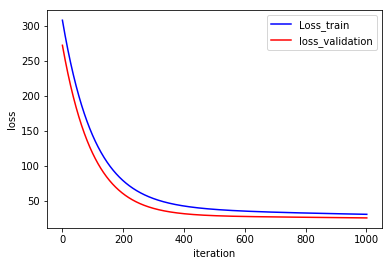

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(i,Loss_train,'b-',lw=1.5,label='Loss_train')
plt.plot(i,Loss_validation,'r-',lw=1.5,label='loss_validation')
plt.legend(loc='upper right')
plt.xlabel('iteration')
plt.ylabel('loss')